# 指数衰减学习率

In [ ]:
import tensorflow as tf
# 指数衰减学习率
# 指数衰减学习率 = 初始学习率 * 学习率衰减率 ^ (当前轮次 / 多少轮衰减一次)
w = tf.Variable(tf.constant(5, dtype=tf.float32))
epoch = 40
# 最初学习率
LR_BASE = 0.2
# 学习率衰减率
LR_DECAY = 0.99
# 喂了多少轮BATCH_SIZE后，更新一次学习率
LR_STEP = 1

# 定义epoch顶层循环，表示对数据集循环epoch次
for epoch in range(epoch):
    # lr 学习率随着epoch的变化不断的衰减
    lr = LR_BASE * LR_DECAY ** (epoch / LR_STEP)
    
    # with 开启一个GradientTape()的上下文，该上下文会监控在它之下的所有计算活动
    with tf.GradientTape() as tape:
        # 定义loss函数
        loss = tf.square(w + 1)
    # 使用tape.gradient()来计算loss对w的求导值
    grads = tape.gradient(loss, w)

    # 使用w.assign_sub()来更新w的值
    w.assign_sub(lr * grads)
    print("After %s epoch,w is %f,loss is %f,lr is %f" % (epoch, w.numpy(), loss, lr))



After 0 epoch,w is 2.600000,loss is 36.000000,lr is 0.200000
After 1 epoch,w is 1.174400,loss is 12.959999,lr is 0.198000
After 2 epoch,w is 0.321948,loss is 4.728015,lr is 0.196020
After 3 epoch,w is -0.191126,loss is 1.747547,lr is 0.194060
After 4 epoch,w is -0.501926,loss is 0.654277,lr is 0.192119
After 5 epoch,w is -0.691392,loss is 0.248077,lr is 0.190198
After 6 epoch,w is -0.807611,loss is 0.095239,lr is 0.188296
After 7 epoch,w is -0.879339,loss is 0.037014,lr is 0.186413
After 8 epoch,w is -0.923874,loss is 0.014559,lr is 0.184549
After 9 epoch,w is -0.951691,loss is 0.005795,lr is 0.182703
After 10 epoch,w is -0.969167,loss is 0.002334,lr is 0.180876
After 11 epoch,w is -0.980209,loss is 0.000951,lr is 0.179068
After 12 epoch,w is -0.987226,loss is 0.000392,lr is 0.177277
After 13 epoch,w is -0.991710,loss is 0.000163,lr is 0.175504
After 14 epoch,w is -0.994591,loss is 0.000069,lr is 0.173749
After 15 epoch,w is -0.996452,loss is 0.000029,lr is 0.172012
After 16 epoch,w is

# 激活函数
## sigmoid函数

sigmoid 函数 f（x） = 1 / (1 + e^-x)

在 tf 库中，使用 tf.sigmoid(x) 函数即可实现 sigmoid 函数

sigmoid函数图像：
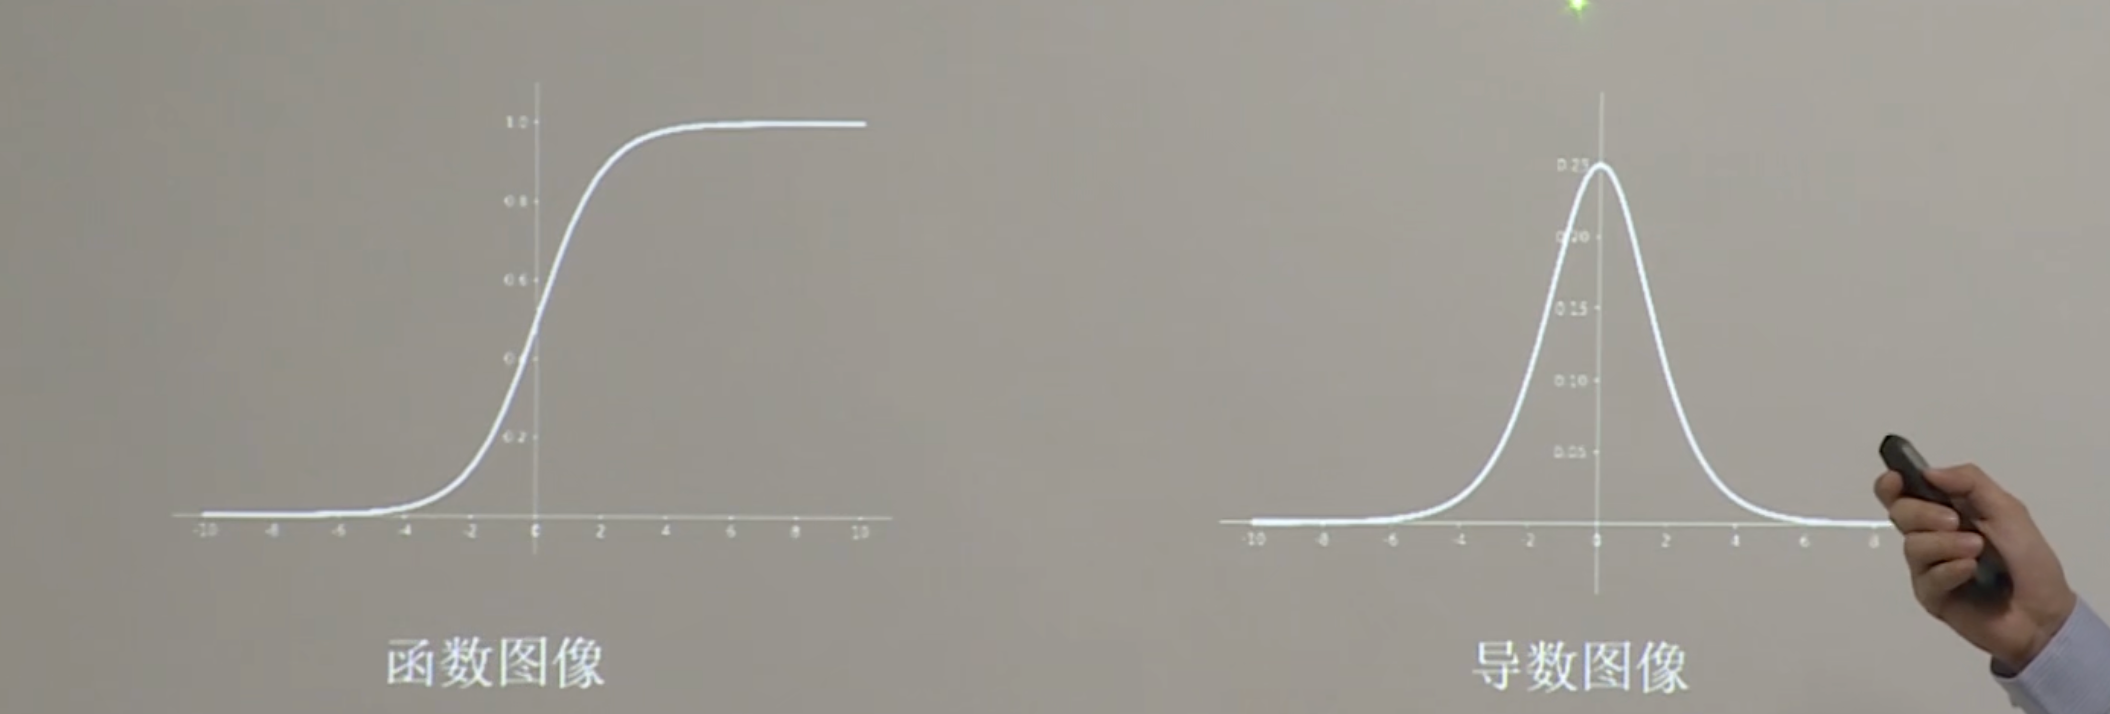


特点：
- 易造成梯度消失
- 输出非0均值，收敛慢
- 幂运算复杂，计算量大，训练时间长


sigmoid为什么易造成梯度消失？
- 范围问题：Sigmoid 函数会将输入值压缩到  (0, 1)  的范围，大部分值远离 0（中心），使梯度趋近于 0。
- 导数过小：Sigmoid 的导数最大值只有 0.25（当  x = 0  时），而大多数情况下导数更小。
- 链式效应：小梯度累积到深层网络会导致梯度消失问题。
    - 什么是梯度消失？ 
        - 训练神经网络时，前面的层因为‘信号变弱’，导致后面的层无法得到足够的信息，从而造成梯度消失。

为什么输出非0均值，收敛慢？
- 什么是为0均值？
    - 当网络的一层输出不是以0为中心，而是偏向某个正数或负数时，称为输出非0均值。也就是说，这层输出的值不平衡，大多数偏离了0.
- 为什么收敛慢？
    - 输出非0均值时，梯度不均衡，方向难找
        - 比如：想象在一个高低起伏的山谷（损失函数的图形）里开车找山谷底（最优点），如果车总是被推向某一边（因为非0均值导致梯度偏向一边），就很难找到正确的下降方向。 



## Tanh函数 

Tanh函数 f(x) = 1 - e^(-2x) / 1 + e^(-2x)

在tf库中，我们可以直接调用tf.tanh()函数来计算tanh函数的值。

tanh图像：
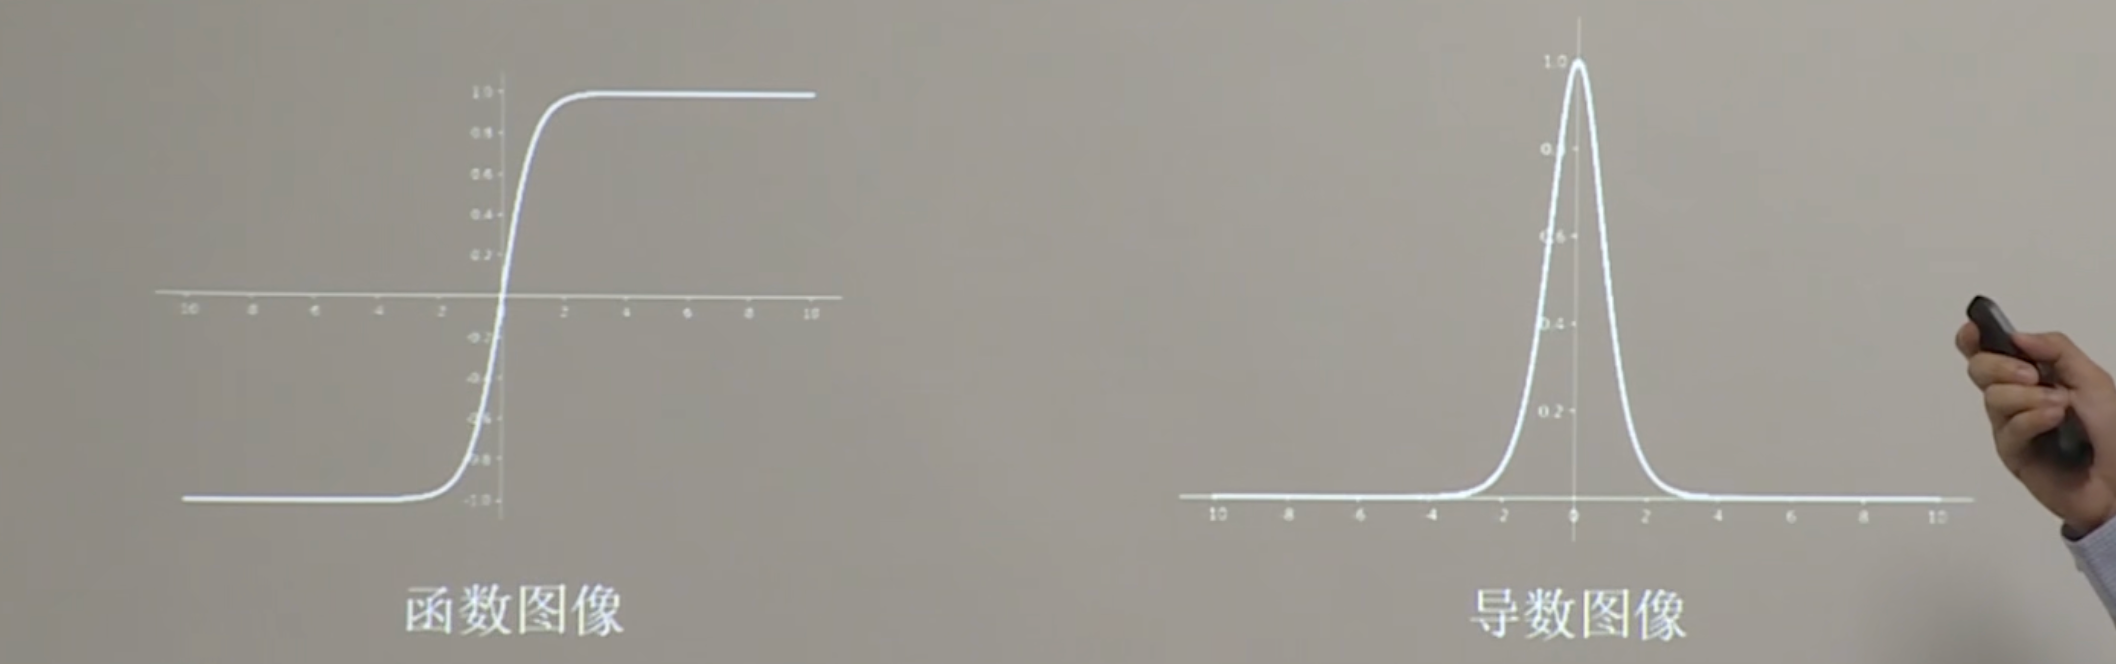

特点：
- 输出是0均值
- 易造成梯度消失
- 幂运算复杂，训练时间长

什么是0均值？
- 在神经网络中，神经元的输出值是0均值，即输出值与输入值的平均值是0。

为什么Tanh函数输出是0均值？
- Tanh 函数的数学特性（关于原点对称）使得它的输出天然是 0 均值。正因为如此，Tanh 在某些场景下比 Sigmoid 更适合深度学习，因为它能帮助梯度在正负两侧更均衡地传播。

为什么Tanh函数易造成梯度消失？
- Tanh 函数在输入很大或很小时输出接近于饱和状态，导数趋近于 0，导致梯度在反向传播中逐层衰减，从而造成梯度消失。
- Tanh 函数输出范围为 (-1, 1)，因此当输入值很大时，输出值接近于 -1 或 1，梯度几乎为 0，造成梯度消失。

## Relu函数

Relu函数  : $f(x) = max(0, x)$
$$
f(x) =
\begin{cases} 
x, & \text{if } x > 0 \\
0, & \text{if } x \leq 0
\end{cases}
$$

在tf中，可以使用tf.nn.relu()函数来计算Relu函数。
函数图像：
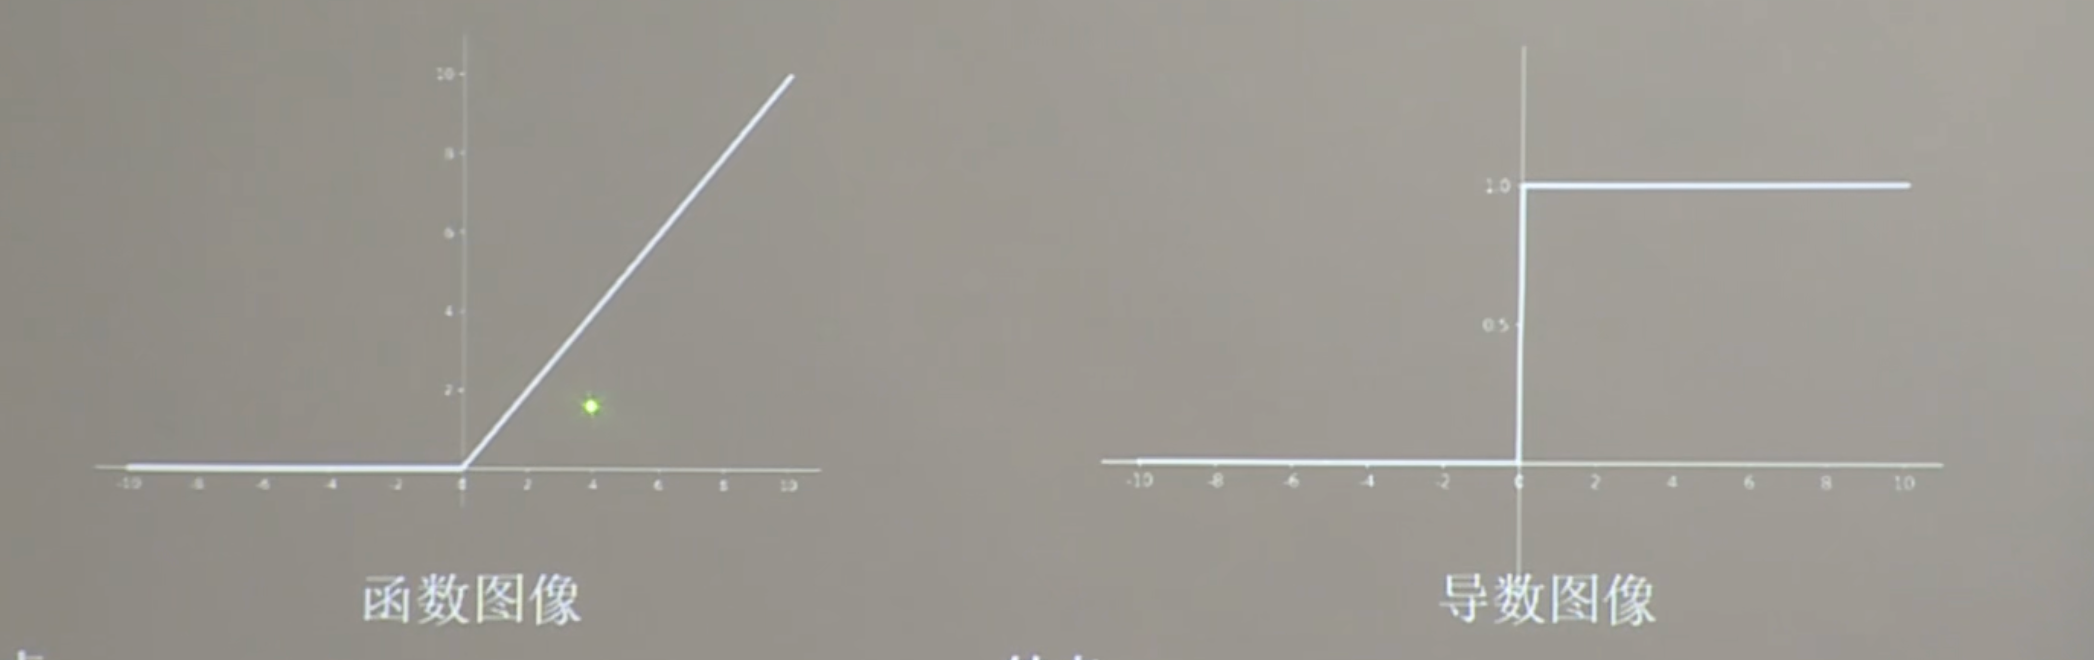


优点：
1. 解决了梯度消失问题(在正区间)
2. 只需要判断输入是否大于0，计算速度快
3. 收敛速度远快于sigmoid函数 和 tanh函数

缺点：
1. 输出非0均值，收敛慢
2. 存在Read ReLU 问题,某些神经元肯呢个会永远“死”掉，导致相应的参数永远不会被更新

为什么Relu函数在正区间解决了梯度消失问题呢？
- 因为当x>0时，f(x)=x，梯度为1，和sigmoid和tanh的“饱和”区不同，所以梯度不会消失。

梯度消失的本质：
- 梯度消失发生在深度神经网络中，原因是激活函数的导数太小。当我们使用链式法则计算梯度时，每一层的梯度被上层的导数相乘，如果导数接近 0，梯度会指数级衰减，最终几乎消失。

为什么Relu函数存在Read ReLU 问题呢？
- 当输入值始终为0时，某些神经元永远不会激活，导致相应的参数永远不会被更新。



## Leaky Relu函数

Leaky Relu函数 : $f(x) = max(\alpha * x, x)$

在tf中，可以使用tf.nn.leaky_relu函数实现Leaky Relu函数。

Leaky Relu函数图像：
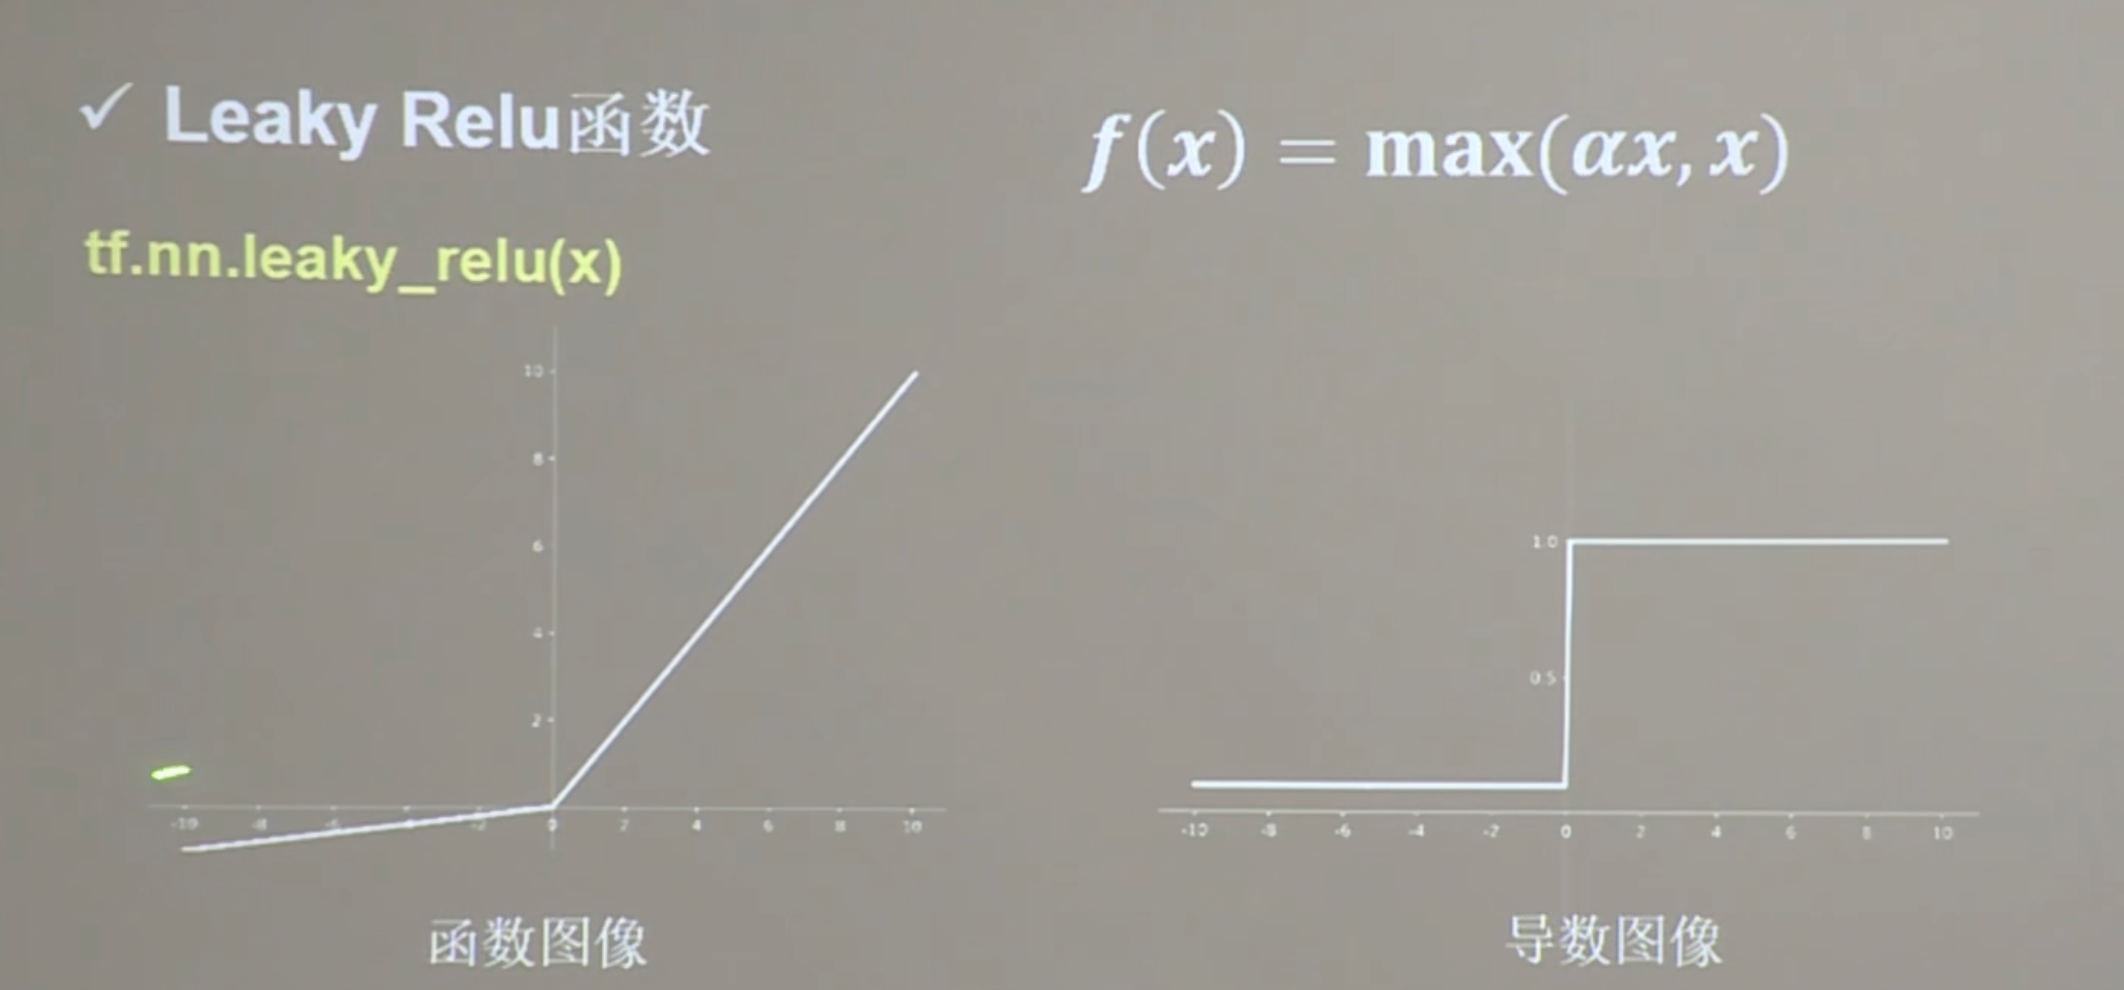

理论上说，Leaky Relu函数有Relu 函数的优点，同时也有Relu函数没有的特性。并且不会有Dying Relu问题。

但实际操作中，Leaky Relu函数在深度学习中并不常用。

## 激活函数使用建议

- 首选relu 激活函数
- 学习率设置较小值
- 输入特征标准化，即让输入特征满足以0为均值，1为标准差的正态分布
- 初始化参数中心化，即让随机生成的参数满足以0为均值，以 $\sqrt{\frac{2}{n}}$ 为标准差的正态分布（n为当前层输入特征个数）


为什么首选relu激活函数？
1. 计算简单，效率高  $f(x)=max(0,x)$
2. 梯度不等于0，不会出现梯度消失问题(当 $x$ > 0时，$f'(x) = 1$ 可以在正区间有效传播梯度，避免梯度消失问题 )
3. 训练速度快，收敛快
4. 容易理解，实现时只需要判断 $x$ 是否大于0即可


为什么学习率设置较小值？
1. 梯度下降时，学习率过大会导致梯度爆炸，即梯度值过大，无法正常更新参数，导致模型无法收敛
2. 梯度下降时，学习率过小会导致梯度消失，即梯度值过小，无法正常更新参数，导致模型无法收敛
3. 梯度下降时，学习率过大会导致梯度消失，即梯度值过小，无法正常更新参数，导致模型无法收敛

为什么需要输入特征标准化？
1. 输入特征标准化后，可以加快模型收敛速度
    - 比喻：如果特征的尺度差异很大，就像跑步者在不同高度的坡道上跑步，速度会受到地形的影响。标准化后的特征就像是在平坦的跑道上，大家跑得差不多快。
2. 在没有标准化的情况下，某些尺度较大的特征可能对模型有更大的影响，而其他特征的影响较小。
3. 避免数值不稳定 (当特征值过大时，梯度更新步长过小，可能导致参数更新缓慢甚至不更新)

为什么需要初始化参数中心化？
1. 避免对称性问题
    - 对称性问题：如果所有参数在初始化时都取相同的值，那么参数更新后所有的参数都会取相同的值，从而无法有效学习到不同特征的信息。
2. 初始化中心化的作用
    - 通过初始化时是参数满足以0为均值，可以打破对称性，让参数在训练时能够学习到不同特征的信息
3. 加速模型收敛





# 损失函数

损失函数（loss） ： 预测值(y)与真实值(y_)之间的误差

NN优化目标 : loss最小化 --> 
-  mes(Mean Squared Error)
-  cust(Custom Loss)
-  ce(Cross Entropy)

## 均方误差mse 

均方误差mse ： MSE(y_, y) = $ \frac {1} {n} \sum\limits _ {i = 1} ^ n（y\_-y）^2$

在tensoflow中计算均方误差mse的函数是
```
loss_mse =  tf.reduce_mean(tf.square(y_ - y))
```



均方误差demo

预测酸奶日销量y, x1,x2是影响日销量的因素。

建模前，应预先采集的数据有：每日x1, x2值，以及真实的销量y_值。 （最佳情况，产量=销量）
拟造数据集 X,Y_ = y_ = x1 + x2 噪音：-0.05~0.05 拟合模型可以预测销量的函数

In [ ]:
import numpy as np

# random seed ,确保每次运行的结果都相同
SEED = 23455

# 定义获取随机数种子的函数
rdm = np.random.RandomState(seed = SEED)
x = rdm.rand(32,2)

# 通过列表推导式生成 y_(真实值)
# [expression for item in iterable] 列表推导式
# 这段代码会遍历 iterable 中的每一个 item，对每个 item 执行 expression，并将结果放入新列表。
# 【for (x1,x2) in x】 中 (x1, x2) 表示解包每个二元组，把每个二元组的第一个元素赋值给 x1，第二个元素赋值给 x2
# 【x1 + x2 + (rdm.rand() / 10.0 - 0.05)】 表示对于每一对二元组，计算 x1 + x2 + (随机噪声)
# 通过列表推导式，y_ 最终将是一个包含多个子列表的列表，每个子列表包含一个预测值（x1 + x2 + (随机噪声)）
y_ = [[x1 + x2 + (rdm.rand() / 10.0 - 0.05)] for (x1,x2) in x]

# print(f'x = {x}')
# print(f'y_ = {y_}')

# 对x 进行类型转换 确保x 的类型为 float32
x = tf.cast(x, dtype = tf.float32)

# 定义权重
w1 = tf.Variable(tf.random.normal([2,1], stddev = 0.01,seed = 1), name = 'weights')

# 定义循环次数和学习率
epoch = 15000
lr = 0.002


for epoch in range(epoch):
    print()


